In [1]:
import pandas as pd



In [2]:
df = pd.read_csv("ecommerce_transactions.csv")

In [3]:
print(df.shape)

(50000, 8)


In [4]:
df.head()

Transaction_ID        User_Name  Age  Country Product_Category  \
0               1         Ava Hall   63   Mexico         Clothing   
1               2      Sophia Hall   59    India           Beauty   
2               3  Elijah Thompson   26   France            Books   
3               4     Elijah White   43   Mexico           Sports   
4               5       Ava Harris   48  Germany           Beauty   

   Purchase_Amount Payment_Method Transaction_Date  
0           780.69     Debit Card       2023-04-14  
1           738.56         PayPal       2023-07-30  
2           178.34    Credit Card       2023-09-17  
3           401.09            UPI       2023-06-21  
4           594.83    Net Banking       2024-10-29

In [5]:
print(df.isnull().sum())

Transaction_ID      0
User_Name           0
Age                 0
Country             0
Product_Category    0
Purchase_Amount     0
Payment_Method      0
Transaction_Date    0
dtype: int64


In [24]:
# Aggregate by User_Name
user_df = df.groupby('User_Name').agg({
    'Age': 'mean',                     # average age (if multiple entries)
    'Purchase_Amount': ['sum', 'mean', 'count']  # total, avg, and number of purchases
})

# Flatten column names
user_df.columns = ['Age', 'Total_Purchase', 'Avg_Purchase', 'Num_Transactions']
user_df = user_df.reset_index()

user_df.head()

User_Name        Age  Total_Purchase  Avg_Purchase  Num_Transactions
0     Ava Allen  44.082996       247865.13    501.751275               494
1  Ava Anderson  43.875764       246801.09    502.649878               491
2     Ava Clark  44.218569       273776.79    529.548917               517
3      Ava Hall  44.510638       268756.73    519.838936               517
4    Ava Harris  43.932692       266846.08    513.165538               520

In [8]:
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Total_Purchase', 'Avg_Purchase', 'Num_Transactions']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(user_df[features])

C:\Users\77075\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\77075\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\77075\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\77075\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

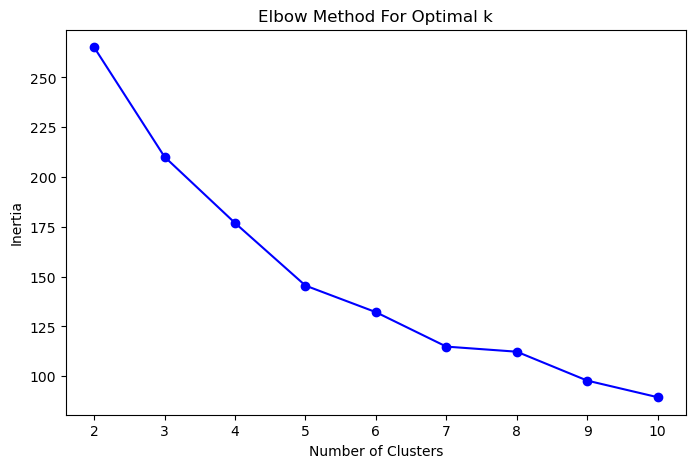

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [15]:
for k in range(2, 8):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    score = silhouette_score(X_scaled, model.labels_)
    print("k =", k, "score =", score)

k = 2 score = 0.3064052529768023
k = 3 score = 0.2575371929018363
k = 4 score = 0.24162346972990026
k = 5 score = 0.2684807530020872
k = 6 score = 0.2574000763507193
k = 7 score = 0.2749884858656832


C:\Users\77075\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\77075\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\77075\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\77075\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [16]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
user_df["Cluster"] = kmeans.labels_

C:\Users\77075\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
# Count customers in each cluster
print(user_df['Cluster'].value_counts())

# Cluster statistics
cluster_summary = user_df.groupby('Cluster')[features].mean()
print(cluster_summary)

Cluster
1    65
0    35
Name: count, dtype: int64
               Age  Total_Purchase  Avg_Purchase  Num_Transactions
Cluster                                                           
0        43.898111   236628.329143    493.231956        479.914286
1        44.001653   259630.740462    508.368366        510.815385


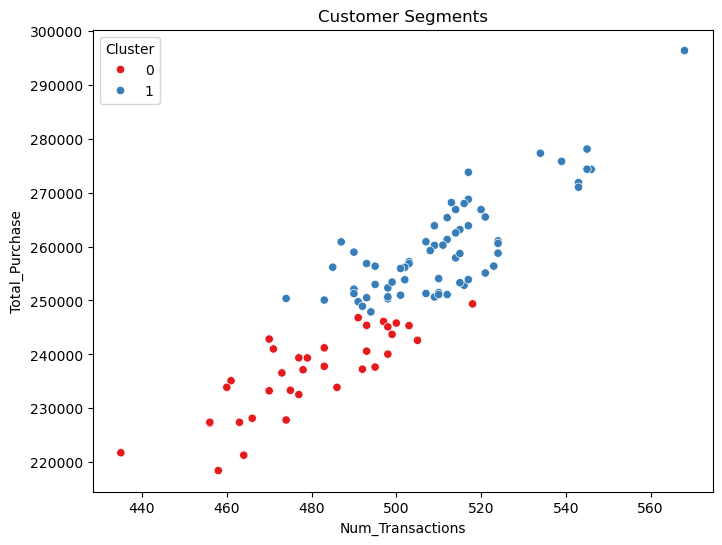

In [19]:
import seaborn as sns

# Scatter plot: Total_Purchase vs Num_Transactions
plt.figure(figsize=(8,6))
sns.scatterplot(data=user_df, x='Num_Transactions', y='Total_Purchase', hue='Cluster', palette='Set1')
plt.title('Customer Segments')
plt.show()

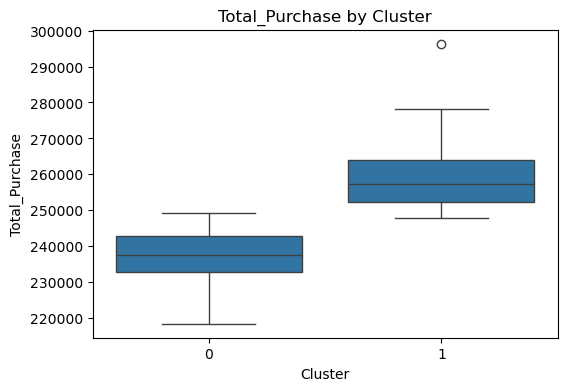

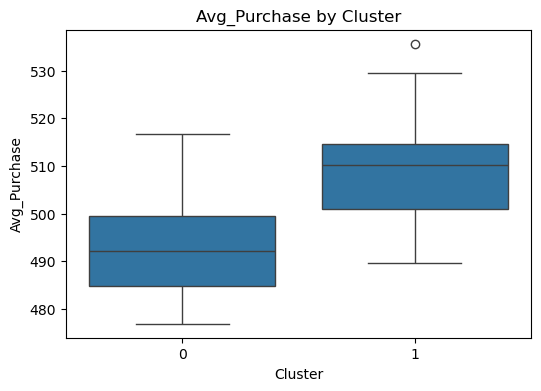

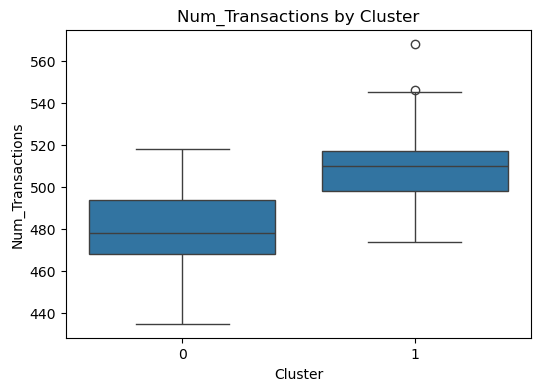

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["Total_Purchase", "Avg_Purchase", "Num_Transactions"]

for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Cluster", y=col, data=user_df)
    plt.title(f"{col} by Cluster")
    plt.show()

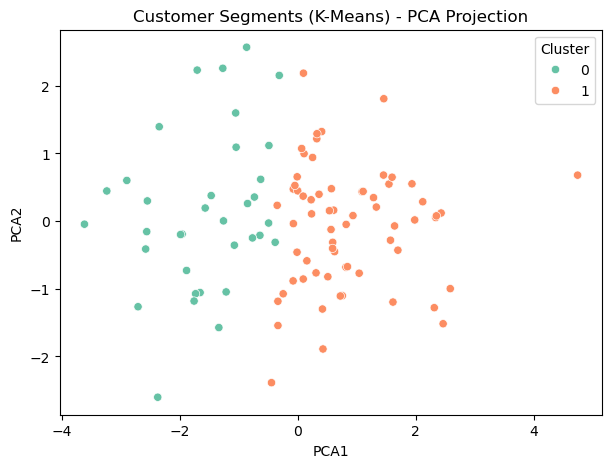

In [21]:
from sklearn.decomposition import PCA

# PCA to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

user_df["PCA1"] = pca_result[:, 0]
user_df["PCA2"] = pca_result[:, 1]

# Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="Set2",
    data=user_df
)
plt.title("Customer Segments (K-Means) - PCA Projection")
plt.show()

In [22]:
user_df.to_csv("clustered_customers.csv", index=False)
print("File saved as clustered_customers.csv")

File saved as clustered_customers.csv
